<a href="https://colab.research.google.com/github/ryaltic/Spaceship-Titanic-Kaggle/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/ryaltic/Spaceship-Titanic-Kaggle/refs/heads/main/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [54]:
df.head(n=10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [55]:
df['PassengerId'].is_unique

True

In [56]:
# Could create a variable to group people together in the same group by keeping only the first 4 characters
df['PassengerGroup'] = df['PassengerId'].str[:4]
df.drop(columns=['PassengerId'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


In [57]:
name_counts = df['Name'].value_counts()
name_counts[name_counts > 1]


,count
Name,
Ankalik Nateansive,2
Gwendy Sykess,2
Cuses Pread,2
Keitha Josey,2
Glenna Valezaley,2
Sharie Gallenry,2
Alraium Disivering,2
Loree Wolfernan,2
Glena Hahnstonsen,2


In [58]:
dupe_names = name_counts[name_counts > 1].index
df[df['Name'].isin(dupe_names)].sort_values('Name')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup
7270,Europa,False,C/253/P,55 Cancri e,28.0,False,7.0,489.0,0.0,4.0,6027.0,Alraium Disivering,False,7775
6296,Europa,True,B/222/P,55 Cancri e,17.0,False,0.0,0.0,0.0,0.0,0.0,Alraium Disivering,True,6665
476,Europa,True,D/18/S,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Ankalik Nateansive,True,0512
2930,Europa,False,E/196/P,TRAPPIST-1e,77.0,False,0.0,9032.0,0.0,128.0,1464.0,Ankalik Nateansive,True,3176
8488,Earth,False,F/1855/P,55 Cancri e,22.0,False,0.0,0.0,1072.0,46.0,3.0,Anton Woody,False,9071
2991,Earth,False,E/200/P,TRAPPIST-1e,18.0,False,0.0,30.0,0.0,756.0,5.0,Anton Woody,False,3236
2559,Mars,False,F/569/P,TRAPPIST-1e,52.0,False,758.0,0.0,356.0,5.0,0.0,Apix Wala,False,2746
4108,Mars,False,F/902/P,PSO J318.5-22,32.0,False,192.0,0.0,441.0,18.0,0.0,Apix Wala,False,4387
7871,Europa,True,B/329/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,Asch Stradick,True,8398
6086,Europa,False,D/202/P,55 Cancri e,55.0,False,114.0,222.0,0.0,2575.0,2919.0,Asch Stradick,False,6432


In [59]:
df.drop(columns=['Name'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004


In [60]:
df.groupby('HomePlanet').count()

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup
HomePlanet,,,,,,,,,,,,
Earth,4488,4507,4503,4514,4487,4499,4505,4490,4503,4491,4602,4602
Europa,2073,2070,2094,2085,2089,2095,2085,2078,2086,2094,2131,2131
Mars,1716,1722,1717,1716,1716,1723,1721,1723,1723,1720,1759,1759


In [61]:
df.groupby('Destination').count()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup
Destination,,,,,,,,,,,,
55 Cancri e,1769,1756,1750,1766,1757,1771,1763,1752,1761,1760,1800,1800
PSO J318.5-22,780,777,778,782,774,775,780,778,780,784,796,796
TRAPPIST-1e,5765,5765,5788,5787,5781,5787,5791,5778,5790,5781,5915,5915


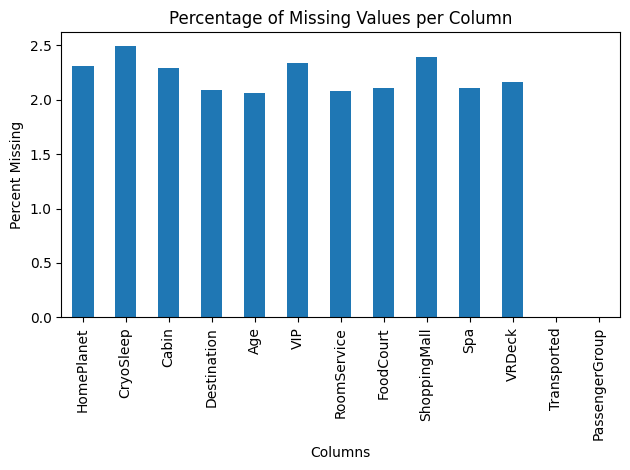

In [62]:
import matplotlib.pyplot as plt

missing_pct = df.isna().mean() * 100

missing_pct.plot(kind='bar')
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percent Missing")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()


In [63]:
df['HomePlanet_Missing'] = df['HomePlanet'].isna().astype(int)
df['CryoSleep_Missing'] = df['CryoSleep'].isna().astype(int)
df['Cabin_Missing'] = df['Cabin'].isna().astype(int)
df['Destination_Missing'] = df['Destination'].isna().astype(int)
df['Age_Missing'] = df['Age'].isna().astype(int)
df['VIP_Missing'] = df['VIP'].isna().astype(int)
df['RoomService_Missing'] = df['RoomService'].isna().astype(int)
df['FoodCourt_Missing'] = df['FoodCourt'].isna().astype(int)
df['ShoppingMall_Missing'] = df['ShoppingMall'].isna().astype(int)
df['Spa_Missing'] = df['Spa'].isna().astype(int)
df['VRDeck_Missing'] = df['VRDeck'].isna().astype(int)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,CryoSleep_Missing,Cabin_Missing,Destination_Missing,Age_Missing,VIP_Missing,RoomService_Missing,FoodCourt_Missing,ShoppingMall_Missing,Spa_Missing,VRDeck_Missing
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0,0,0,0,0,0,0,0,0,0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0,0,0,0,0,0,0,0,0,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0,0,0,0,0,0,0,0,0,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df['Deck'] = df['Cabin'].str.split('/').str[0]
df['Num'] = df['Cabin'].str.split('/').str[1]
df['Side'] = df['Cabin'].str.split('/').str[2]
df.drop(columns=['Cabin'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Age_Missing,VIP_Missing,RoomService_Missing,FoodCourt_Missing,ShoppingMall_Missing,Spa_Missing,VRDeck_Missing,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0,0,0,0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,0,0,0,0,0,0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,0,0,0,0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,0,0,0,0,0,0,F,1,S


In [65]:
from sklearn.impute import SimpleImputer

numeric_cols = df.select_dtypes(include="number").columns

imputer = SimpleImputer(strategy="median")

df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

imputer = SimpleImputer(strategy="most_frequent")

df[cat_cols] = imputer.fit_transform(df[cat_cols])




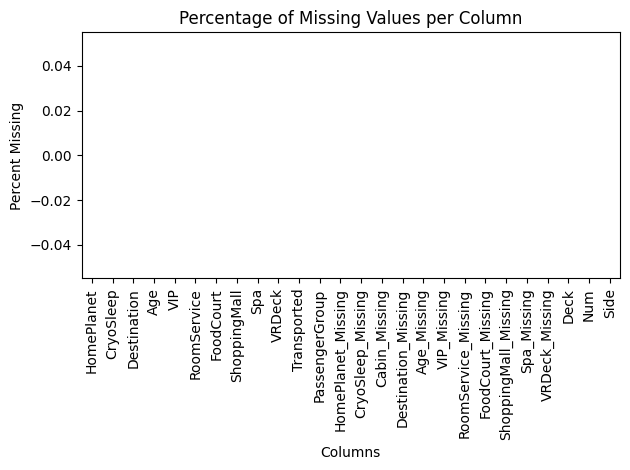

In [66]:
missing_pct = df.isna().mean() * 100

missing_pct.plot(kind='bar')
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percent Missing")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

In [67]:
df['group_VIP'] = (
    df.groupby('PassengerGroup')['VIP']
      .transform(lambda x: x.astype(int).sum())
)
df['group_CryoSleep'] = (
    df.groupby('PassengerGroup')['CryoSleep']
      .transform(lambda x: x.astype(int).sum())
)
df.drop(columns=['PassengerGroup'], inplace=True)
df.head(n=20)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,RoomService_Missing,FoodCourt_Missing,ShoppingMall_Missing,Spa_Missing,VRDeck_Missing,Deck,Num,Side,group_VIP,group_CryoSleep
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,B,0,P,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0.0,0.0,0.0,0.0,0.0,F,0,S,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0.0,0.0,0.0,0.0,0.0,A,0,S,1,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0.0,0.0,0.0,0.0,0.0,A,0,S,1,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0.0,0.0,0.0,0.0,0.0,F,1,S,0,0
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,...,0.0,0.0,0.0,0.0,0.0,F,0,P,0,0
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,F,2,S,0,1
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,G,0,S,0,1
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,...,0.0,0.0,0.0,0.0,0.0,F,3,S,0,0
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,B,1,P,0,2


In [68]:
df['TotalSpend'] = (
    df['RoomService'] +
    df['FoodCourt'] +
    df['ShoppingMall'] +
    df['Spa'] +
    df['VRDeck']
)
df.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,FoodCourt_Missing,ShoppingMall_Missing,Spa_Missing,VRDeck_Missing,Deck,Num,Side,group_VIP,group_CryoSleep,TotalSpend
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,B,0,P,0,0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0.0,0.0,0.0,0.0,F,0,S,0,0,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0.0,0.0,0.0,0.0,A,0,S,1,0,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0.0,0.0,0.0,0.0,A,0,S,1,0,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0.0,0.0,0.0,0.0,F,1,S,0,0,1091.0


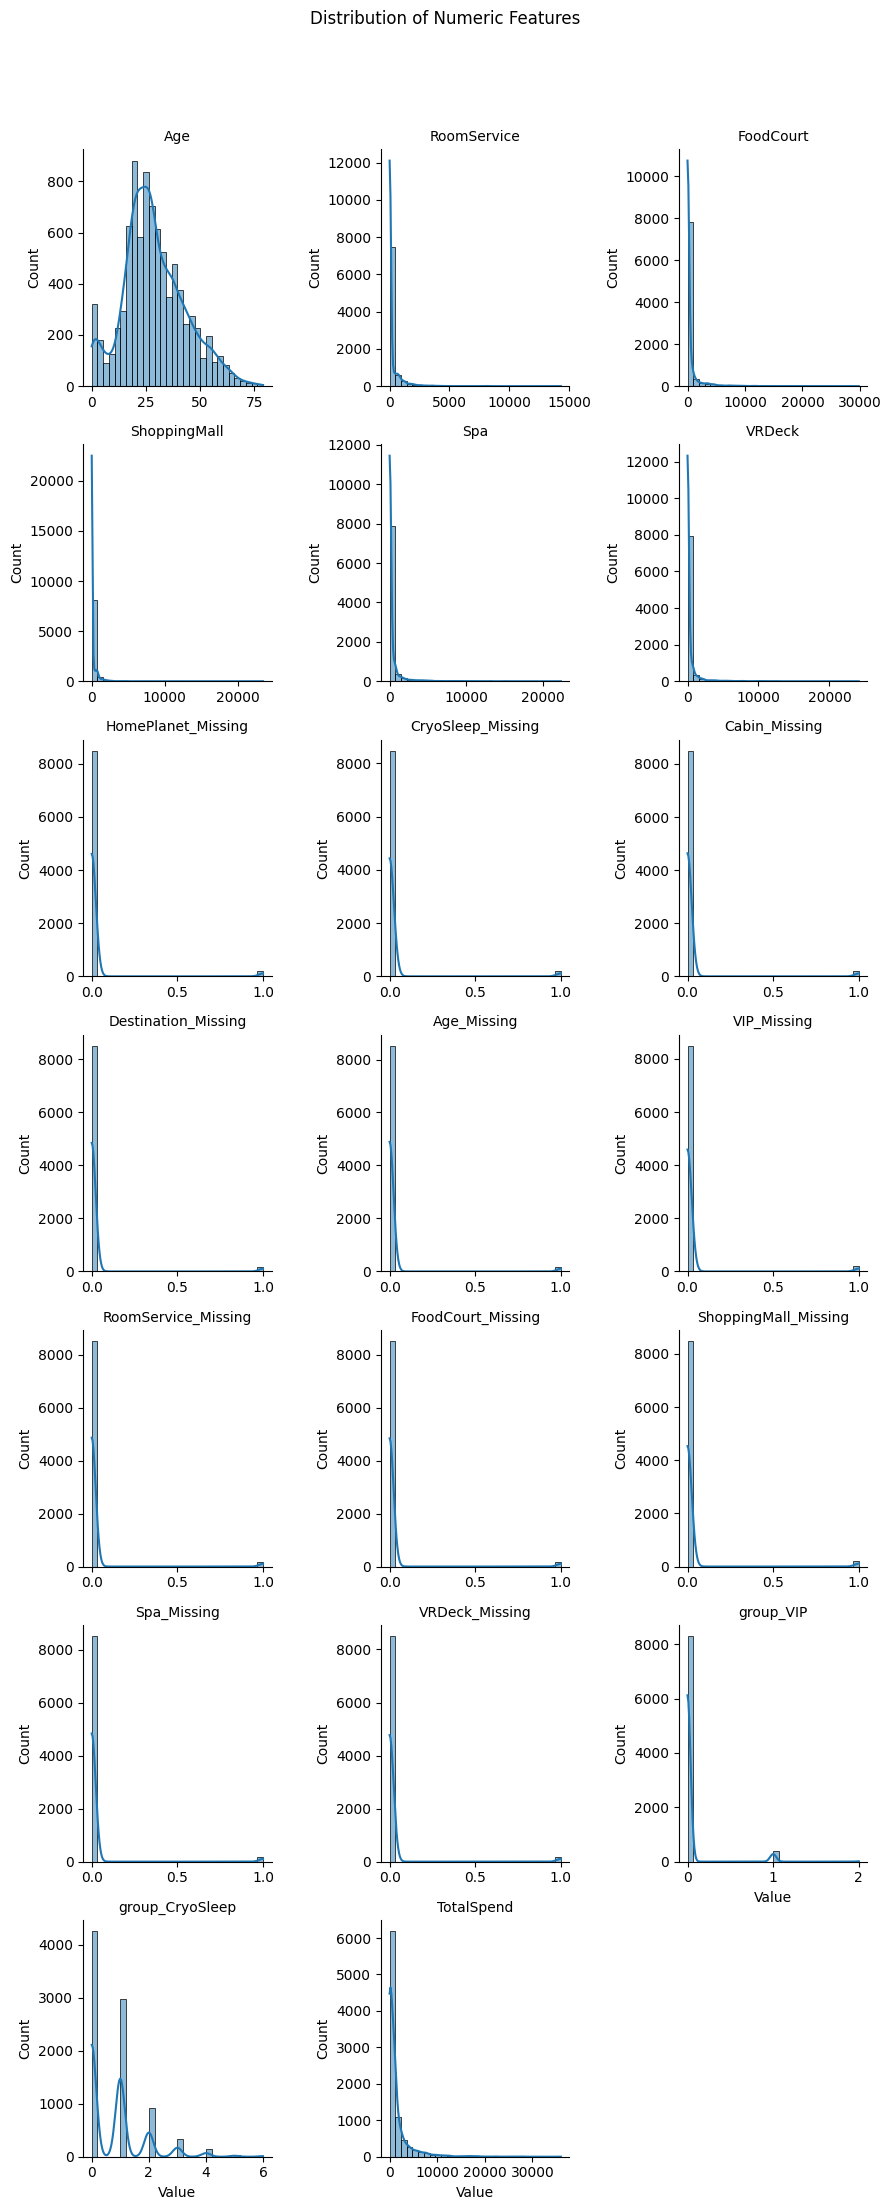

In [69]:
import seaborn as sns

numeric_column = df.select_dtypes(include="number")

df_long = numeric_column.melt(var_name="Feature", value_name="Value")

g = sns.FacetGrid(
    df_long,
    col="Feature",
    col_wrap=3,
    sharex=False,
    sharey=False
)

g.map(sns.histplot, "Value", bins=30, kde=True)

g.set_titles("{col_name}")
g.fig.suptitle("Distribution of Numeric Features", y=1.05)

plt.show()


In [70]:
# Potentially logging RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
# or just Target Variable
# Could create binned variables

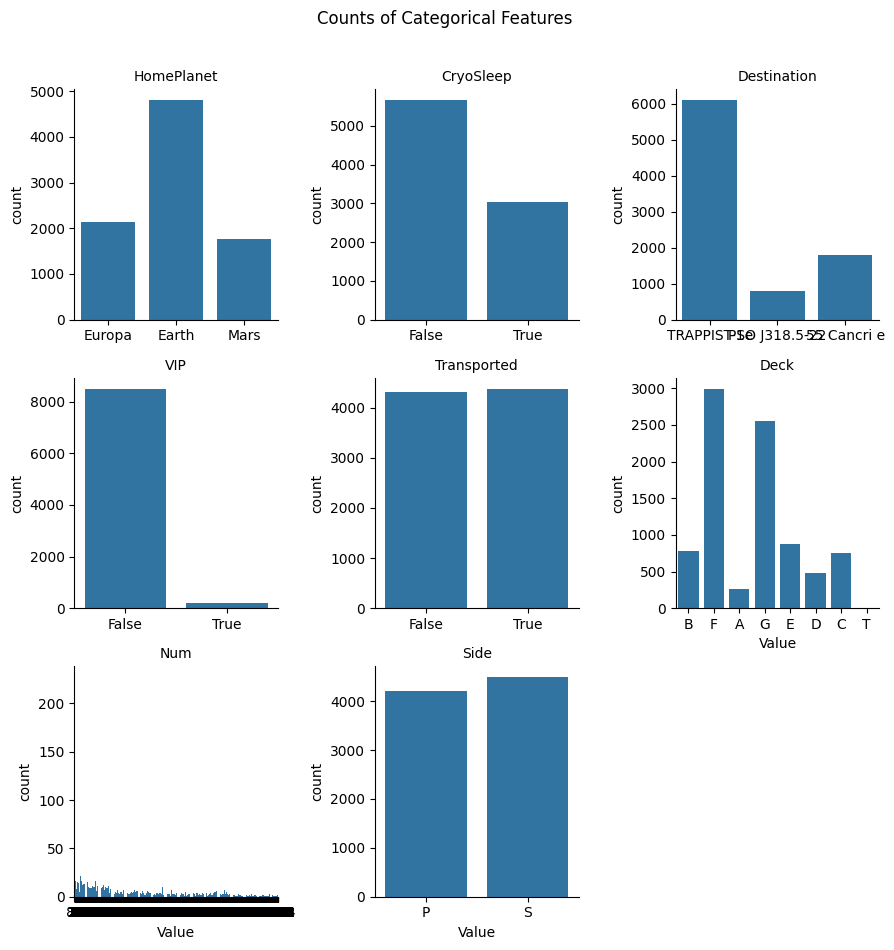

In [71]:
cat_columns = df.select_dtypes(include=["object", "category", "bool"])
df_long = cat_columns.melt(var_name="Feature", value_name="Value")

g = sns.FacetGrid(
    df_long,
    col="Feature",
    col_wrap=3,
    sharex=False,
    sharey=False
)

g.map(sns.countplot, "Value", order=None)

g.set_titles("{col_name}")
g.fig.suptitle("Counts of Categorical Features", y=1.05)

plt.show()


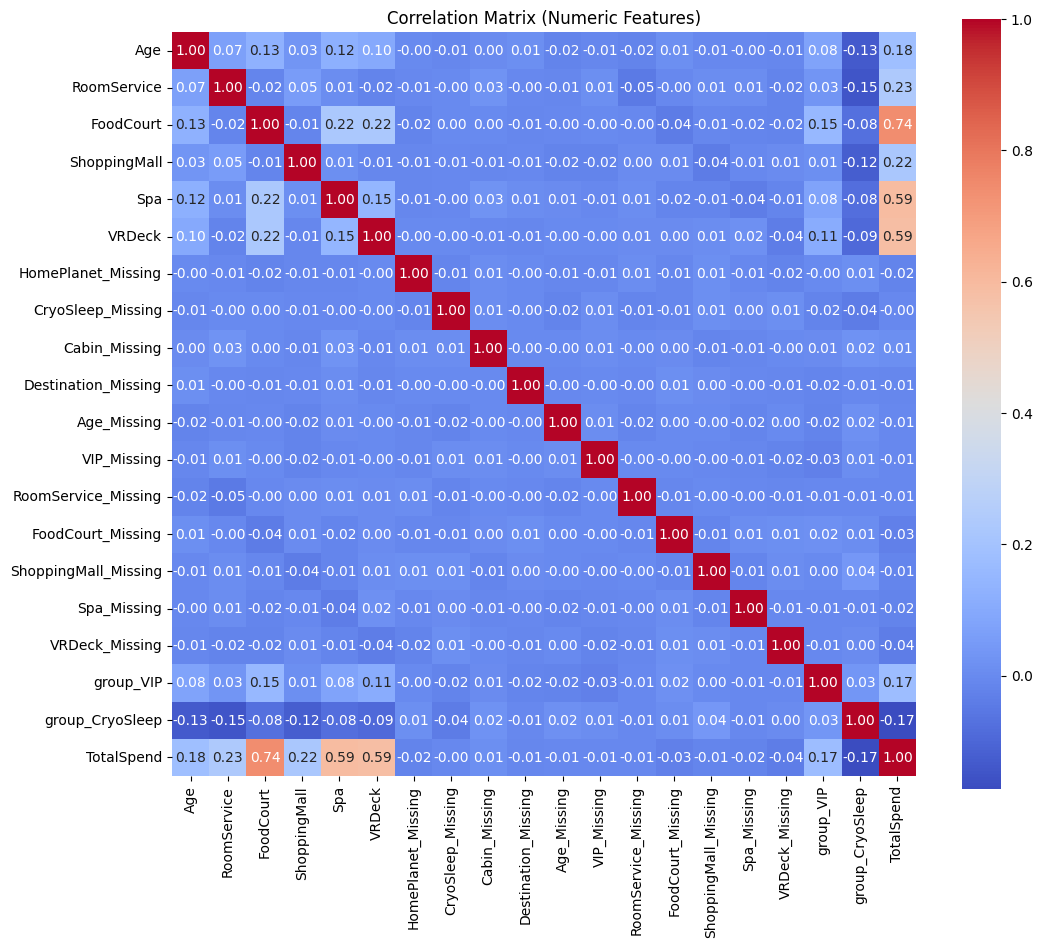

In [72]:
# Correlation Matrix
import pandas as pd

numeric_column = df.select_dtypes(include="number")
corr = numeric_column.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)

plt.title("Correlation Matrix (Numeric Features)")
plt.show()


In [73]:
# Things to do
# Test Significance of Individual Predictors
# Test Logging
# Redo some of the code to split into train and test set
# Modelling
# Documenation